In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

In [3]:
data = pd.read_csv('data/trip.csv')

In [4]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [19]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
dtype: int64

In [18]:
data['fare_amount']=data['fare_amount'].fillna(data['fare_amount'].median())

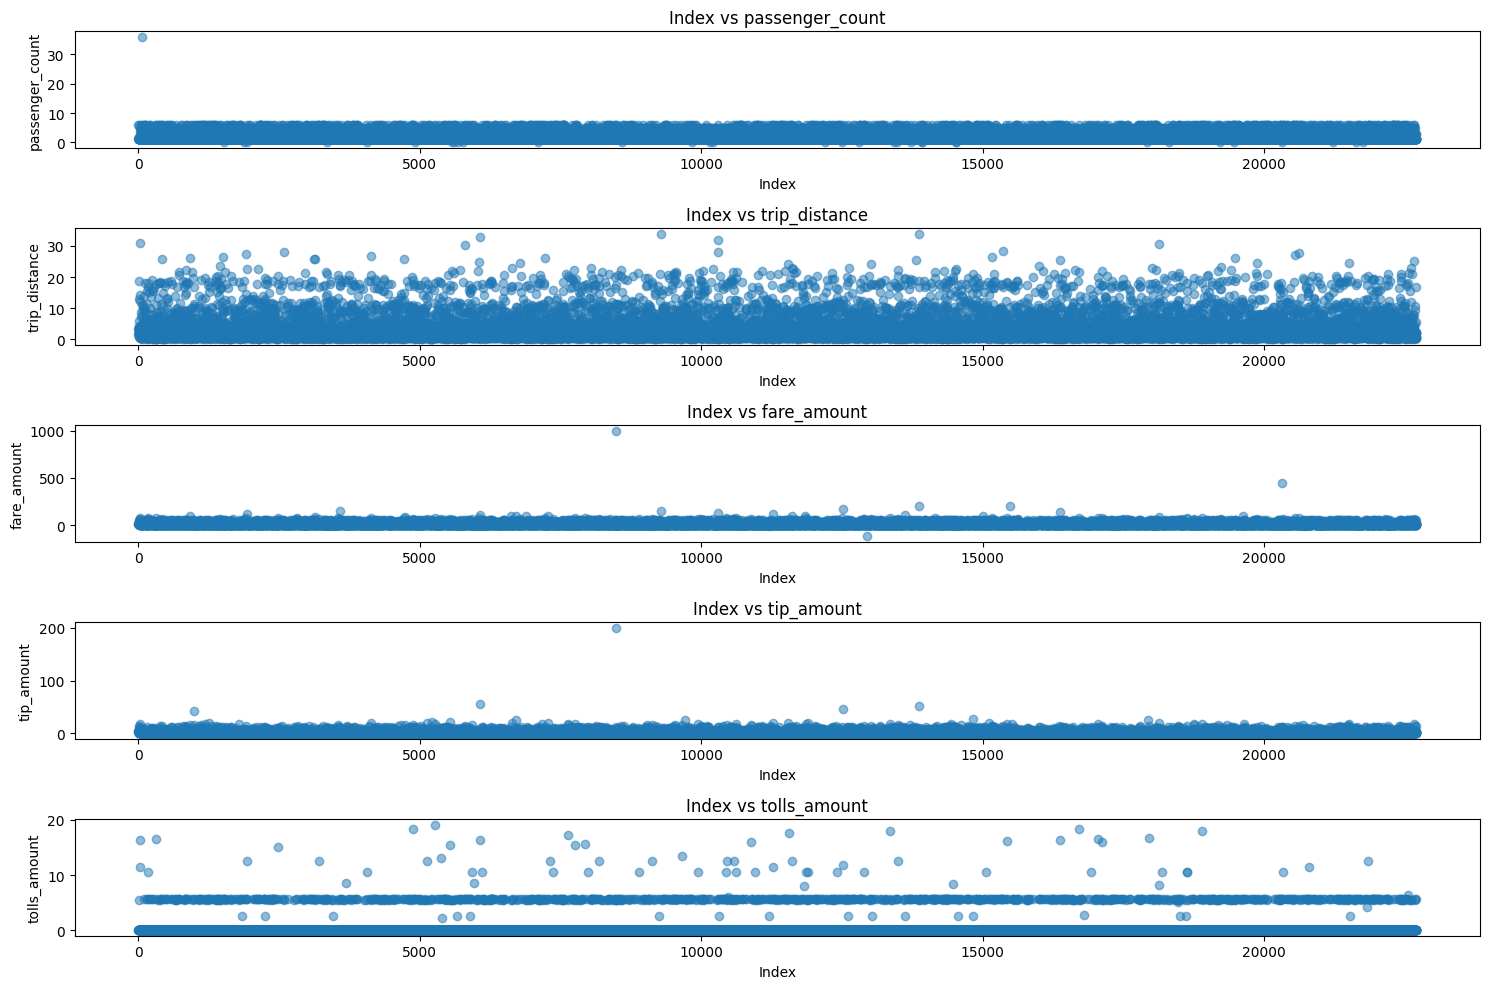

In [20]:
# 숫자형 변수 각각에 대해 index와 변수 값의 scatter plot을 그립니다.
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    plt.scatter(data.index, data[col], alpha=0.5)
    plt.title(f'Index vs {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [21]:
# 이상치 제거: 각 변수별로 IQR을 이용해 이상치를 제거합니다.
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

data = remove_outliers(data, numeric_cols)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_97147/1514797934.py:8: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zq/z7nyx1kd14qdfcnvzpg7mcww0000gn/T/ipykernel_97147/1514797934.py:8: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tig

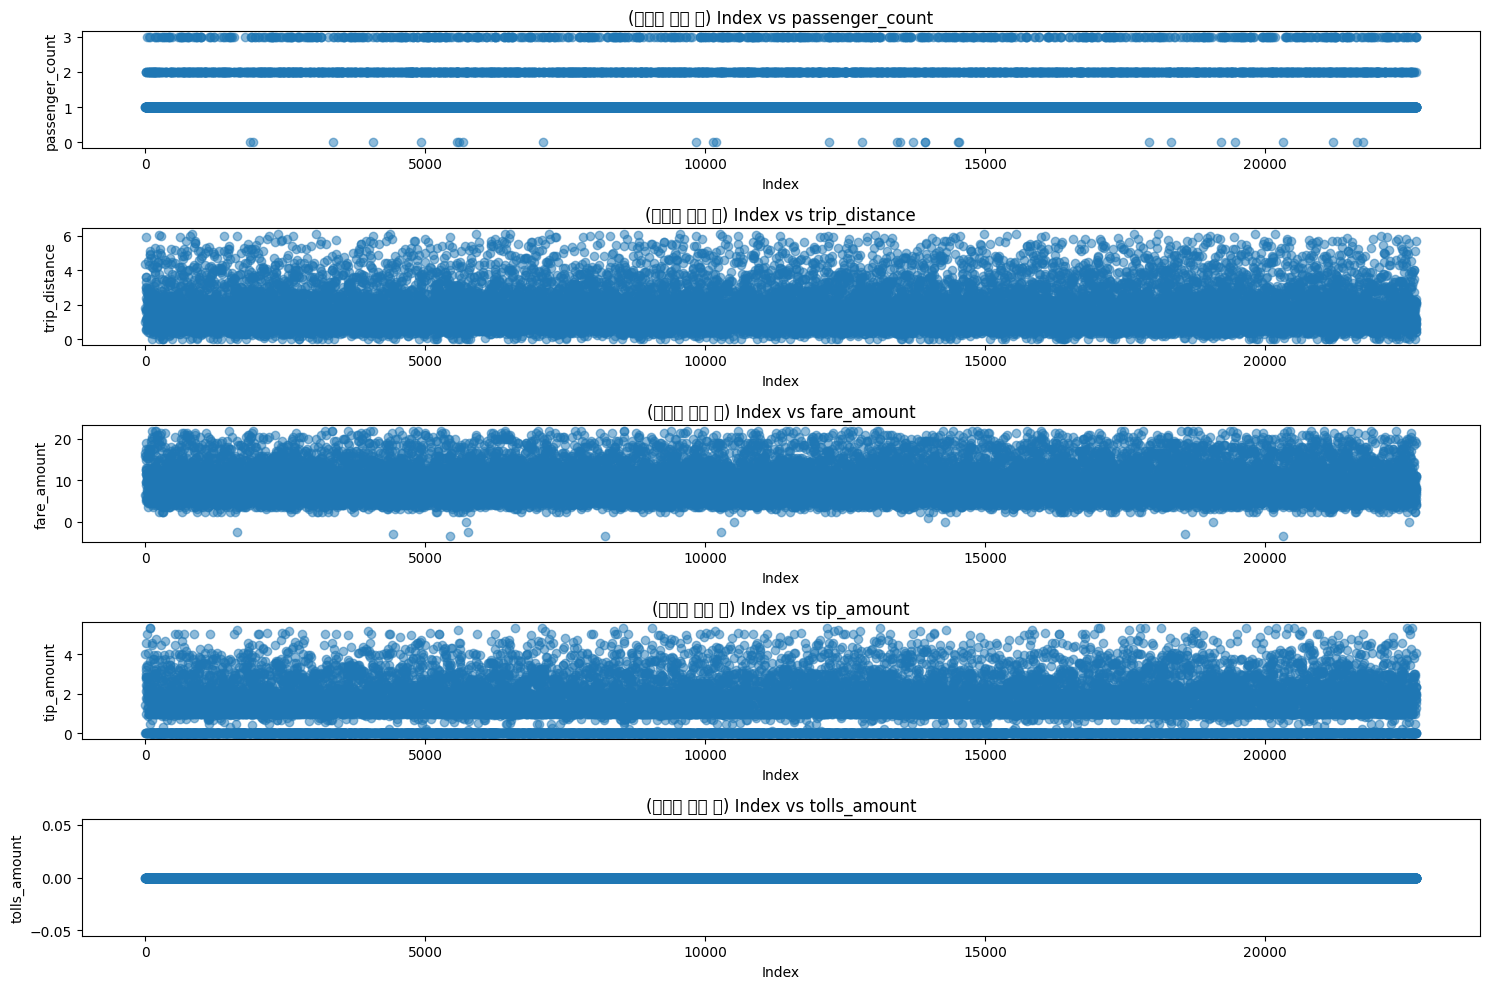

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    plt.scatter(data.index, data[col], alpha=0.5)
    plt.title(f'(이상치 제거 후) Index vs {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [28]:
data['payment_method'] = data['payment_method'].replace({'Credit Card':'Card', 'Debit Card':'Card'})
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Card,1,2.98,16.0,1.78,0.0
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.0
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.0


In [34]:
# 원본 데이터의 날짜 형식이 '%m/%d/%Y %I:%M:%S %p'이므로 해당 포맷으로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# '년 월 일 시 분 초' 형식으로 문자열 변환
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0
7,Hannah Foley,2017-08-15 17:41:06,2017-08-15 18:03:05,Card,1,2.98,16.0,1.78,0.0
8,Katie Whitney,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,2017-08-10 22:20:04,2017-08-10 22:29:31,Cash,1,0.89,7.5,1.76,0.0
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.0
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.0
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.0


In [37]:
# 승차 시간과 하차 시간의 차이를 계산하여 이용시간(시:분) 컬럼을 추가합니다.
import numpy as np

# 문자열을 datetime으로 변환
pickup_dt = pd.to_datetime(data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
dropoff_dt = pd.to_datetime(data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# 이용시간(초) 계산
duration_sec = (dropoff_dt - pickup_dt).dt.total_seconds()

# 시, 분, 초로 변환
hours = (duration_sec // 3600).astype(int)
minutes = ((duration_sec % 3600) // 60).astype(int)
seconds = np.round(duration_sec % 60).astype(int)

# 초가 60이 되는 경우 분에 반영
minutes += (seconds // 60)
seconds = seconds % 60

# 분이 60이 되는 경우 시에 반영
hours += (minutes // 60)
minutes = minutes % 60

# '이용시간' 컬럼 생성 (시:분, 초는 반올림해서 표시하지 않음)
data['ride_time'] = hours.astype(str) + ':' + minutes.astype(str).str.zfill(2)

# 결과 확인
data


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,date_diff,ride_time
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,2017-04-11,14:53:28,2017-04-11,15:19:58,0,0:26
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,2017-12-15,07:26:56,2017-12-15,07:34:08,0,0:07
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,2017-04-15,23:32:20,2017-04-15,23:49:03,0,0:16
7,Hannah Foley,2017-08-15 17:41:06,2017-08-15 18:03:05,Card,1,2.98,16.0,1.78,0.0,2017-08-15,17:41:06,2017-08-15,18:03:05,0,0:21
8,Katie Whitney,2017-02-04 16:17:07,2017-02-04 16:29:14,Cash,1,1.20,9.0,0.00,0.0,2017-02-04,16:17:07,2017-02-04,16:29:14,0,0:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,2017-08-10 22:20:04,2017-08-10 22:29:31,Cash,1,0.89,7.5,1.76,0.0,2017-08-10,22:20:04,2017-08-10,22:29:31,0,0:09
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.0,2017-02-24,17:37:23,2017-02-24,17:40:39,0,0:03
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.0,2017-09-04,14:54:14,2017-09-04,14:58:22,0,0:04
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.0,2017-07-15,12:56:30,2017-07-15,13:08:26,0,0:11


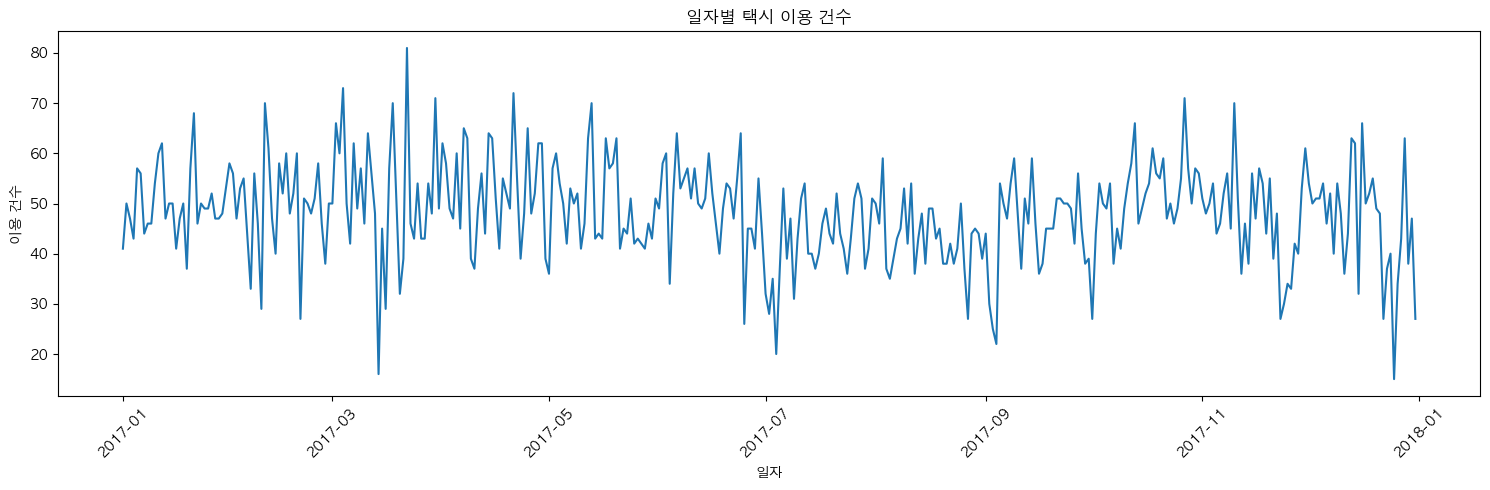

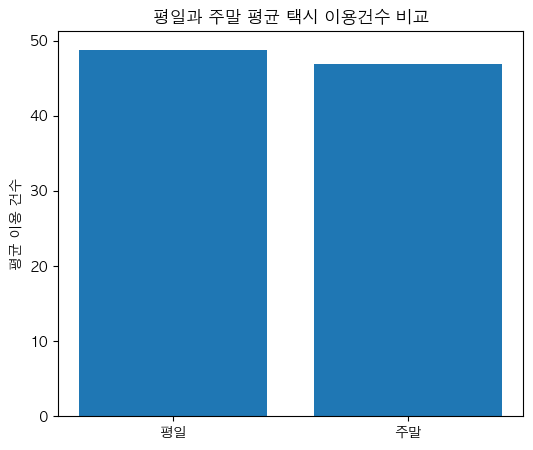

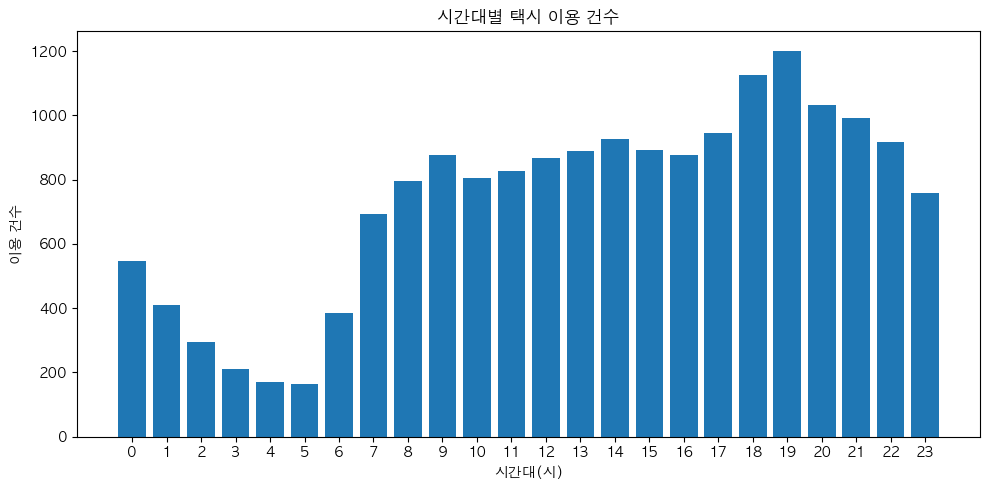

In [40]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 일자별 택시 이용 건수 비교 시각화
data['pickup_date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date
date_counts = data['pickup_date'].value_counts().sort_index()

plt.figure(figsize=(15,5))
plt.plot(date_counts.index, date_counts.values)
plt.title('일자별 택시 이용 건수')
plt.xlabel('일자')
plt.ylabel('이용 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 평일과 주말 평균 택시 이용건수 비교 시각화
data['weekday'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.weekday
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)
weekday_counts = data.groupby(['pickup_date', 'is_weekend']).size().reset_index(name='count')
avg_counts = weekday_counts.groupby('is_weekend')['count'].mean()

plt.figure(figsize=(6,5))
plt.bar(['평일', '주말'], avg_counts)
plt.title('평일과 주말 평균 택시 이용건수 비교')
plt.ylabel('평균 이용 건수')
plt.show()

# 2. 시간대별 택시 이용 건수 비교 시각화
data['pickup_hour'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.hour
hour_counts = data['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hour_counts.index, hour_counts.values)
plt.title('시간대별 택시 이용 건수')
plt.xlabel('시간대(시)')
plt.ylabel('이용 건수')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


주행시간, 주행거리, 요금, 팁의 상관계수:
               ride_time_min  trip_distance  fare_amount  tip_amount
ride_time_min       1.000000       0.683806     0.919732    0.361911
trip_distance       0.683806       1.000000     0.882943    0.366474
fare_amount         0.919732       0.882943     1.000000    0.401746
tip_amount          0.361911       0.366474     0.401746    1.000000


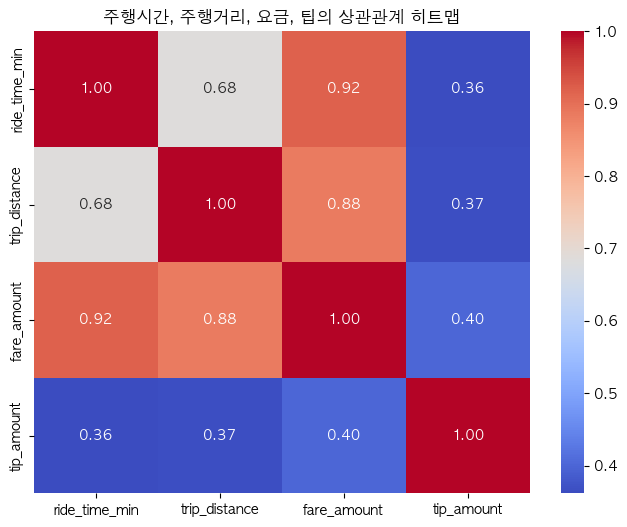

In [41]:
# 주행시간, 주행거리, 요금, 팁의 상관관계 분석

import seaborn as sns

# ride_time을 분 단위로 변환
def ride_time_to_minutes(rt):
    try:
        h, m = 0, 0
        if ':' in str(rt):
            parts = str(rt).split(':')
            if len(parts) == 2:
                h, m = 0, int(parts[0])
                m = int(parts[1])
            elif len(parts) == 3:
                h, m = int(parts[0]), int(parts[1])
            return h * 60 + m
        else:
            return float(rt)
    except:
        return None


# ride_time이 문자열(예: '0:26')이면 분 단위로 변환
if data['ride_time'].dtype == 'O':
    data['ride_time_min'] = data['ride_time'].apply(ride_time_to_minutes)
else:
    data['ride_time_min'] = data['ride_time']

corr_cols = ['ride_time_min', 'trip_distance', 'fare_amount', 'tip_amount']
corr_data = data[corr_cols].dropna()

corr_matrix = corr_data.corr()

print("주행시간, 주행거리, 요금, 팁의 상관계수:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('주행시간, 주행거리, 요금, 팁의 상관관계 히트맵')
plt.show()
